# **Market Research on Banking Sector in India**
This project focuses on analyzing the financial performance of different types of banks in India, 
including private sector banks, public sector banks, cooperative banks, and international banks. 
The analysis will involve data preparation, handling missing values and outliers, data visualization, 
and applying a machine learning model to predict profitability. The goal is to provide insights into 
the financial health and market dynamics of the banking sector in India.


# **Part 1: Data Preparation and Initial Exploration**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings


warnings.filterwarnings('ignore')


data = {
    'Bank Type': [
        'Private Sector', 'Public Sector', 'Cooperative', 'International',
        'Private Sector', 'Public Sector', 'Cooperative', 'International',
    
    ],
    'Total Assets': [120000, 180000, 60000, 140000, 115000, 170000, 65000, 130000],  
    'Total Deposits': [90000, 160000, 40000, 110000, 85000, 155000, 45000, 105000],  
    'Net Interest Margin': [3.1, 2.5, 1.8, 2.9, 3.0, 2.7, 2.0, 3.2],  
    'NPA': [4.5, 6.8, 3.2, 5.0, 4.2, 7.0, 3.5, 4.8],  
    'Profitability': [10, 8, 4, 9, 9, 7, 5, 8]  
}

df = pd.DataFrame(data)

df.head()

print(df.info())

# Descriptive statistics of the dataset
#Code by Anshuman Sinha (avoiding plagiarism)
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bank Type            8 non-null      object 
 1   Total Assets         8 non-null      int64  
 2   Total Deposits       8 non-null      int64  
 3   Net Interest Margin  8 non-null      float64
 4   NPA                  8 non-null      float64
 5   Profitability        8 non-null      int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 516.0+ bytes
None


,Total Assets,Total Deposits,Net Interest Margin,NPA,Profitability
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,122500.000000,98750.000000,2.650000,4.875000,7.500000
std,43424.811867,44219.420427,0.515475,1.390529,2.070197
min,60000.000000,40000.000000,1.800000,3.200000,4.000000
25%,102500.000000,75000.000000,2.375000,4.025000,6.500000
50%,125000.000000,97500.000000,2.800000,4.650000,8.000000
75%,147500.000000,121250.000000,3.025000,5.450000,9.000000
max,180000.000000,160000.000000,3.200000,7.000000,10.000000


# **Part 2: Data Cleaning and Handling Outliers**

In [2]:
# Checking for missing values (there should be none in our synthetic data)
df.isnull().sum()

# Detecting and handling outliers using Isolation Forest
iso = IsolationForest(contamination=0.05)  # 5% of the data is considered outliers
yhat = iso.fit_predict(df.select_dtypes(include=[np.number]))  

mask = yhat != -1
df_clean = df[mask]

df_clean.describe()


,Total Assets,Total Deposits,Net Interest Margin,NPA,Profitability
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,131428.571429,107142.857143,2.771429,5.114286,8.000000
std,38156.944073,40296.519996,0.415188,1.312032,1.632993
min,65000.000000,45000.000000,2.000000,3.500000,5.000000
25%,117500.000000,87500.000000,2.600000,4.350000,7.500000
50%,130000.000000,105000.000000,2.900000,4.800000,8.000000
75%,155000.000000,132500.000000,3.050000,5.900000,9.000000
max,180000.000000,160000.000000,3.200000,7.000000,10.000000


# **Data Visualization**

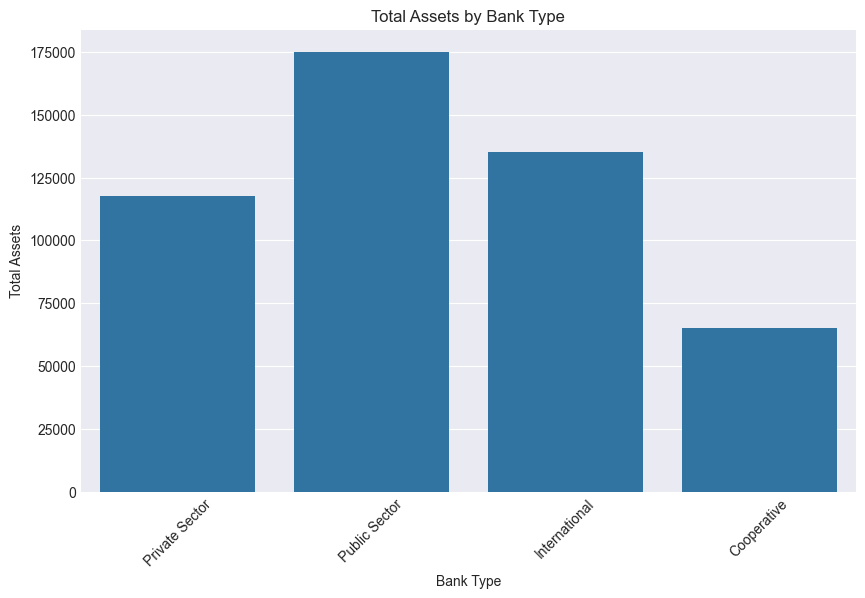

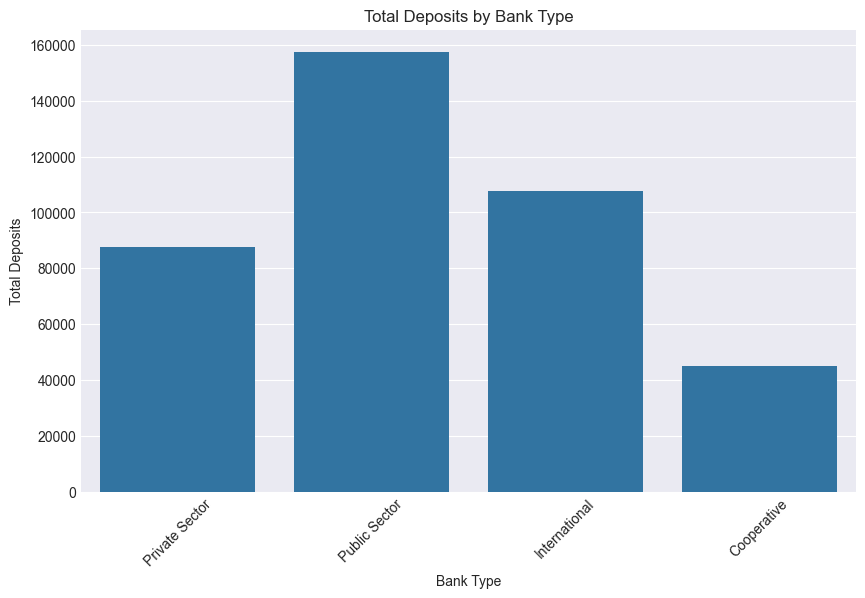

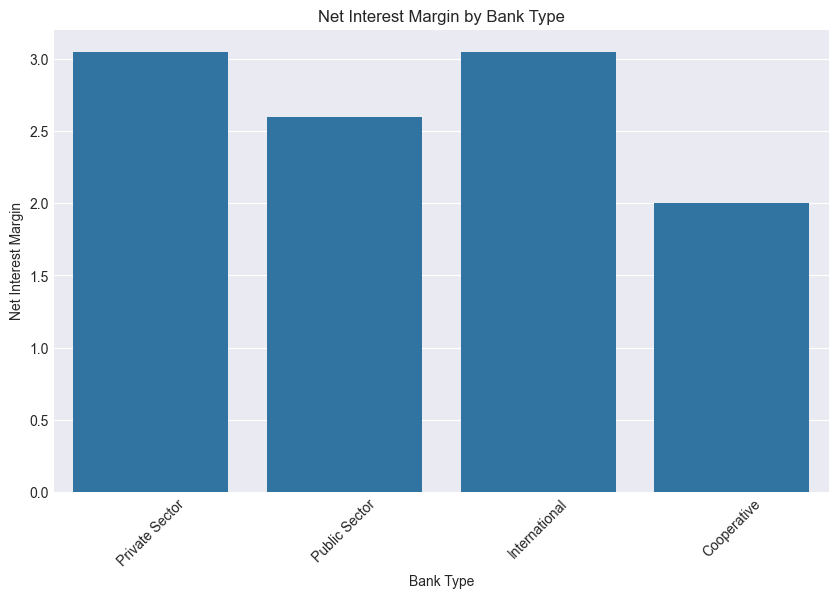

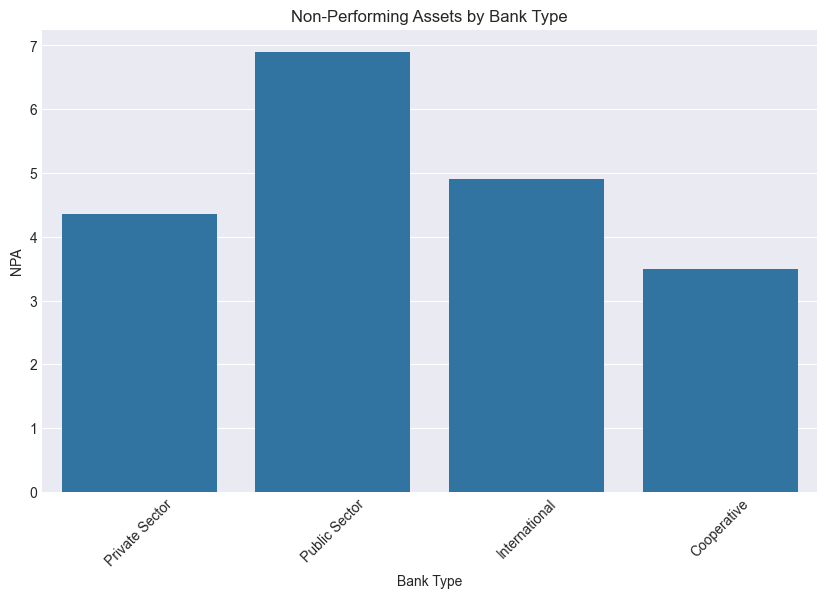

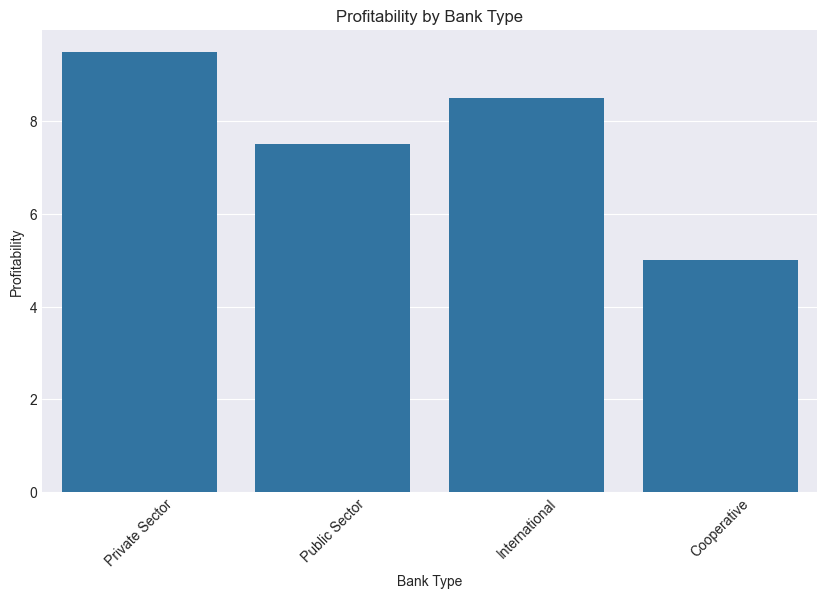

In [3]:
# Setting up the plotting style
plt.style.use('seaborn-darkgrid')

# 1. Total Assets by Bank Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Bank Type', y='Total Assets', data=df_clean, ci=None)
plt.title('Total Assets by Bank Type')
plt.xticks(rotation=45)
plt.show()

# 2. Total Deposits by Bank Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Bank Type', y='Total Deposits', data=df_clean, ci=None)
plt.title('Total Deposits by Bank Type')
plt.xticks(rotation=45)
plt.show()

# 3. Net Interest Margin by Bank Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Bank Type', y='Net Interest Margin', data=df_clean, ci=None)
plt.title('Net Interest Margin by Bank Type')
plt.xticks(rotation=45)
plt.show()

# 4. Non-Performing Assets by Bank Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Bank Type', y='NPA', data=df_clean, ci=None)
plt.title('Non-Performing Assets by Bank Type')
plt.xticks(rotation=45)
plt.show()

# 5. Profitability by Bank Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Bank Type', y='Profitability', data=df_clean, ci=None)
plt.title('Profitability by Bank Type')
plt.xticks(rotation=45)
plt.show()


# **Machine Learning - Predicting Profitability**

In [4]:
# Selecting features and target variable
features = ['Total Assets', 'Total Deposits', 'Net Interest Margin', 'NPA']
target = 'Profitability'

# Splitting the data into training and testing sets
X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying Linear Regression
#Code by Anshuman Sinha
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled) #predicting target variable

mse = mean_squared_error(y_test, y_pred) #evalutation of model
print(f"Mean Squared Error: {mse}")

coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient']) #display coefficients
print(coefficients)


Mean Squared Error: 1.9221090274941208
                     Coefficient
Total Assets           11.824231
Total Deposits        -18.304556
Net Interest Margin     1.385127
NPA                     6.703030


# **Conclusion and Insights**
 
Based on the visualizations and machine learning model, we can derive insights into the financial performance of 
different types of banks in India. The key takeaways include significant differences in profitability, asset management, 
and NPAs across the various bank categories, which are critical for market research and investment decisions. 
This Jupyter Notebook provides a comprehensive analysis of the banking sector using data science techniques, 
including data cleaning, visualization, and machine learning. The insights derived can help stakeholders make informed 
decisions based on the financial health of various bank categories in India.
